

# Project: Investigate the TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I selected the TMDb movie data for analysis for the reason that I'm interested in finding what factors determines the commercial success of a movie.
> After navigating through the dataset, I proposed several questions as follows:
> 1. Which genres are most popular from year to year? 

> 2. Which properties are associated with movies that have high revenues?

> 3. Does higher vote score always mean a bigger commercial success?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

> There are 10866 rows and 21 columns in this dataset.

In [3]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> A brief check on the columns give me a general idea on what characteristics of a movie are provided in this dataset. To answer the 4 questions I proposed, it seems that I don't need all columns. I can delete 'imdb_id', 'homepage', 'tagline'etc. Also, I don't really need the specific release_date, thus I can keep 'release_year' only.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> By checking the above chart, I noticed that the minimum of budget and revenue are both 0.0 and even the runtime minimum can be zero. I might want to drop these movies from the dataset. Also, I might want to use budge_adj & revenue_adj instead of budget & revenue to compensate for the inflation.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> From the info, I can see that there are 10866 movies in record. However, imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies columns have missing values. Luckily, most of these columns are not useful for my analysis. The genres and directors columns miss only a small number of values, thus I can safely drop those rows with missing values for these two columns.

### Data Cleaning
#### Drop columns

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
dropped_column_list = ['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 
                    'production_companies', 'release_date']
df.drop(columns=dropped_column_list, inplace=True)

> drop the columns that are irrelevant to my questions

In [7]:
df.head()

,id,popularity,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


> Confirm that the columns are dropped correctly.

#### Drop rows with zero values

In [8]:
df.query('revenue_adj==0 or budget_adj==0')

,id,popularity,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,Mr. Holmes,Bill Condon,Mystery|Drama,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,Solace,Afonso Poyart,Crime|Drama|Mystery,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,Wild Card,Simon West,Thriller|Crime|Drama,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,2.331636,Survivor,James McTeigue,Crime|Thriller|Action,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,2.272044,Beyond the Reach,Jean-Baptiste LÃ©onetti,Thriller,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,Bruce Brown,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,Grand Prix,John Frankenheimer,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


> From above chart, I found that there are 7011 rows with zero values for either budget or revenue, it's better to drop those rows for reasonable analysis.

In [9]:
df.query('budget_adj!=0 and revenue_adj!=0', inplace=True)

In [10]:
df.shape

(3855, 10)

> After dropping rows with zero values, I ended up with a DataFrame with 3855 rows and 10 columns. The dataset shrinks a lot!

#### Drop duplicates

In [11]:
df.duplicated().sum()

1

> There is one duplicated row in this dataset.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

> After dropping dulicates, confirm with the above code to make sure there is no more duplicated row.

#### Split 'genres' column

In [14]:
dummies = df['genres'].str.get_dummies(sep='|')

> Split the 'genres' column into 20 different columns with each unique genre name

In [15]:
genres_split = pd.concat([df, dummies], axis='columns')

> Concatenate df and dummies along columns to be a new DataFrame names 'genres_split'

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Which genres are most popular from year to year?

In [16]:
genres_sum = genres_split.groupby('release_year')[dummies.columns].sum()

In [17]:
genres_sum

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
1963,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0
1965,2,2,0,1,0,0,3,1,0,0,1,0,1,0,2,0,0,1,1,0
1966,2,2,0,0,0,0,2,0,0,0,0,0,0,1,1,1,0,1,1,1
1967,3,5,1,5,4,0,7,2,1,0,0,0,2,1,4,0,0,3,1,0
1968,2,3,0,0,1,0,6,1,0,0,1,1,1,3,1,3,0,1,2,1


> Use the groupby() and sum() functions to find the number of movies of each genre each year from 1960 to 2015. However, consider that the total number of movies released each year might differ a lot, it should be more reasonable to normalize these numbers I get here.

In [18]:
movies_num_year = genres_split.groupby('release_year').count()

> Use groupby() and count() functions to count the total number of movies released each year.

In [19]:
genres_norm_num = genres_sum/movies_num_year[dummies.columns]*100

> Use DataFrames vectorized operation to get the normalized movie number of each genre each year, here I multiplied a factor 100 to make the numbers in this DF not too small. Here I want to emphasize that the normalized number does not represent the absolute number of movies released but simply the proportions of movies in each genre.

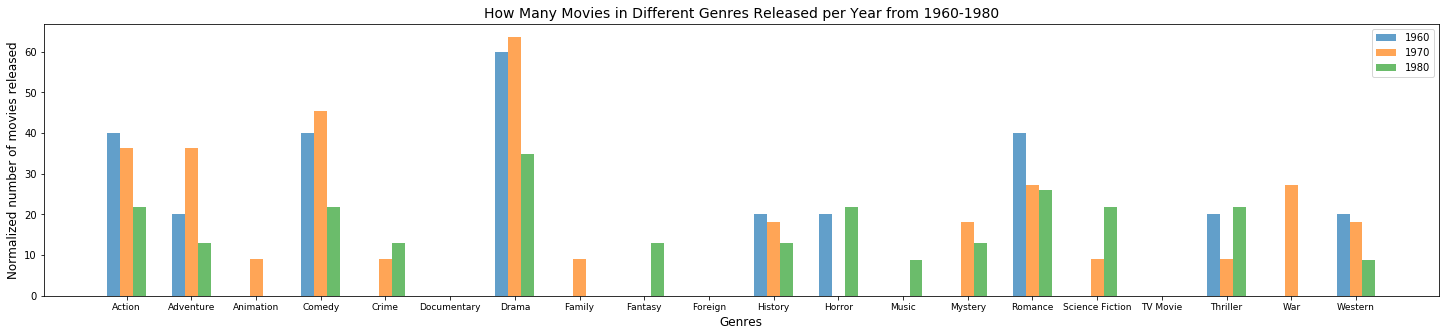

In [20]:
ind = np.arange(len(genres_norm_num.columns))
width = 0.2
tick_size = 9
label_size = 12
title_size = 14
plt.subplots(figsize=(25,5))
plt.bar(ind, genres_norm_num.loc[1960], width, alpha=0.7, label = '1960')
plt.bar(ind+width, genres_norm_num.loc[1970], width, alpha=0.7, label = '1970')
plt.bar(ind+2*width, genres_norm_num.loc[1980], width, alpha=0.7, label = '1980')
plt.xticks(ind+width, genres_norm_num.columns, fontsize=tick_size)
plt.xlabel('Genres', size=label_size)
plt.ylabel('Normalized number of movies released', size=label_size)
plt.title('How Many Movies in Different Genres Released per Year from 1960-1980', size=title_size)
plt.legend();

> Here I decided to look at how the yearly released number of movies in different genres change every 10 years from 1960 to 1980. From the plot, it can be seen that movies in Drama genre are released the most in all three years. One interesting point I noticed is that in 1970, there was a big jump of War movies released. 

>I want to repeat the same analysis for 1990-2010. However, I don't want to retype the same code. Therefore, I'll define a function below to help me make bar plot for any three years.

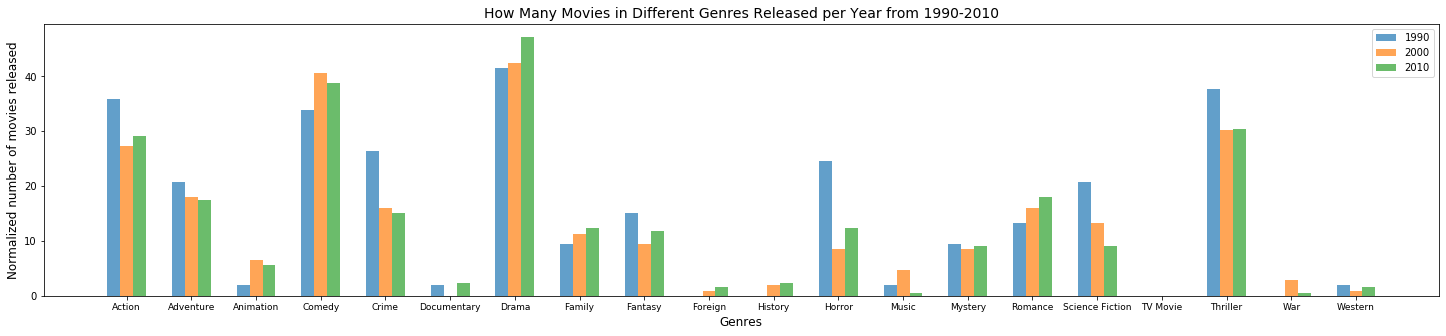

In [21]:
def plot_bars(y1,y2,y3):
    ind = np.arange(len(genres_norm_num.columns))
    width = 0.2
    tick_size = 9
    label_size = 12
    title_size = 14
    plt.subplots(figsize=(25,5))
    plt.bar(ind, genres_norm_num.loc[y1], width, alpha=0.7, label = y1)
    plt.bar(ind+width, genres_norm_num.loc[y2], width, alpha=0.7, label = y2)
    plt.bar(ind+2*width, genres_norm_num.loc[y3], width, alpha=0.7, label = y3)
    plt.xticks(ind+width, genres_norm_num.columns, fontsize=tick_size)
    plt.xlabel('Genres', size=label_size)
    plt.ylabel('Normalized number of movies released', size=label_size)
    plt.title('How Many Movies in Different Genres Released per Year from {}-{}'.format(y1,y3), size=title_size)
    plt.legend();

plot_bars(1990, 2000, 2010)

> I used the self_defined plot_bars function to make a plot for 1990,2000 and 2010. According to this plot, Drama is still the most released movie genre in 1990,2000 & 2010. Comedy seems to be the 2nd. Compared with the plot of 1960-1980, there are much more thriller movies released from 1990-2010. 

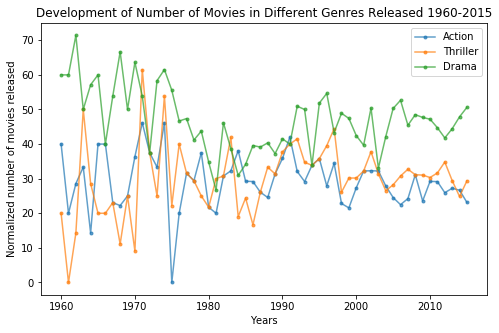

In [22]:
plt.subplots(figsize=(8,5))
plt.plot(genres_norm_num.index, genres_norm_num['Action'], marker='.', linestyle='-',label='Action', alpha=0.7)
plt.plot(genres_norm_num.index, genres_norm_num['Thriller'], marker='.', linestyle='-',label='Thriller', alpha=0.7)
plt.plot(genres_norm_num.index, genres_norm_num['Drama'], marker='.', linestyle='-',label='Drama', alpha=0.7)
plt.xlabel('Years')
plt.ylabel('Normalized number of movies released')
plt.title('Development of Number of Movies in Different Genres Released 1960-2015')
plt.legend();

> I picked three genres to do the chronological analysis. I immediately noticed the huge fluctuation of the data from 1960-1980. This is caused by the small amount of total number of movie released during that period. For example, the total number of movie released in 1960 in my dataset df is only 5. In this case, the normalized number of movie released in each genre is much less meaningful and such normalization will cause big fluctuation as we see here.

In [23]:
genres = dummies.columns ##This is the list of genres
pop_genres = pd.Series(dtype=float)
for genre in genres:
    pop_mean = genres_split[genres_split[genre]==1].popularity.mean() 
    ##A mystery here, I tried to use query('{}==1'.format(genre)) to achieve the filtering, however, 
    ##everytime the program ran to 'Science Fiction', the program stopped. Why??? I didn't figure it out.
    pop_genres[genre] = pop_mean
print(pop_genres)

Action             1.567116
Adventure          1.867693
Animation          1.710622
Comedy             1.012321
Crime              1.123961
Documentary        0.294458
Drama              1.001411
Family             1.459043
Fantasy            1.754315
Foreign            0.179608
History            0.970674
Horror             0.854005
Music              0.899005
Mystery            1.142613
Romance            0.954889
Science Fiction    1.873294
TV Movie           0.273628
Thriller           1.258950
War                1.246129
Western            1.134246
dtype: float64


> I noticed there was a 'popularity' column in the original dataset. I want to know the average popularity of the movies in each genre throughout all those years from 1960 to 2015. By using a loop, I stored all the means in a Series named pop_genres.

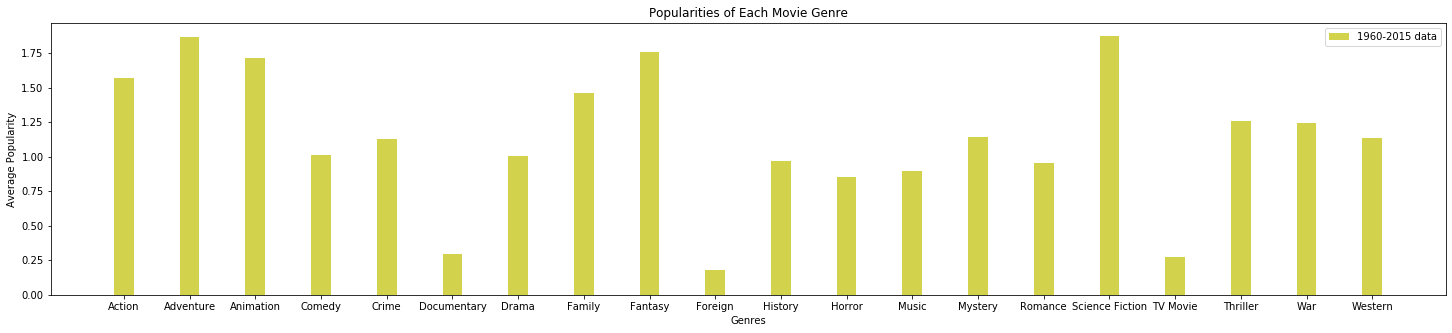

In [24]:
width = 0.3
plt.subplots(figsize=(25,5))
plt.bar(genres, pop_genres, width, alpha=0.7, color='y', label='1960-2015 data')
plt.xlabel("Genres")
plt.ylabel("Average Popularity")
plt.title("Popularities of Each Movie Genre")
plt.legend();

> I plotted each genre's average popularity combining all the data from 1960-2015. Clearly, Science Fiction is the most popular genre. Surprisingly, drama movies do not have a high rank in terms of popularity, although my previous analysis shows that each year the number of drama movies released is the highest among all the genres.

### Research Question 2  Which properties are associated with movies that have high revenues?

In [27]:
def scatter_plot(x,y,colour):
    plt.scatter(df[x], df[y], c=colour, alpha=0.7)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('{} vs {} scatter plot'.format(y,x));

> Define a function called scatter_plot to plot the scatter plot between one variable and another. Here I want to investigate how the revenue_adj changes with the other variables.

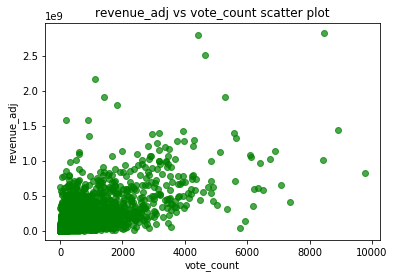

In [28]:
scatter_plot('vote_count', 'revenue_adj', 'g')

> The scatter plot between revenue_adj and vote_count. They seem to have a weak positive correlation.

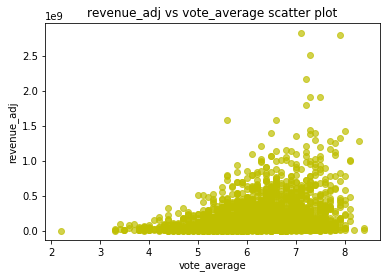

In [29]:
scatter_plot('vote_average', 'revenue_adj', 'y')

> The scatter plot between revenue_adj and vote_average. There seems to be a moderate positive correlation between these two variables. 

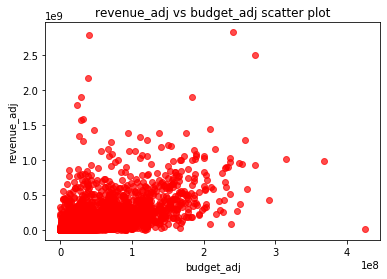

In [30]:
scatter_plot('budget_adj', 'revenue_adj', 'r')

> The scatter plot between revenue_adj and budget_adj. They seem to have a weak positive correlation. 

### Research Question 3 Does higher vote score always mean a bigger commercial success?

In [31]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

> To find the profit of each movie, I use the 'revenue_adj' column to substract 'budget_adj' column and store the number in a new column 'profit'.

In [32]:
df.head(1)

,id,popularity,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


> Use head() function to confirm the 'profit' column is created.

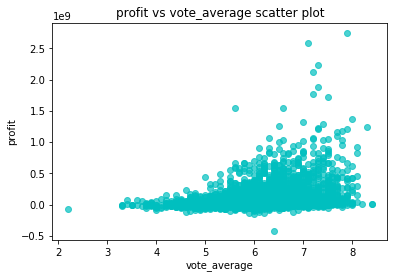

In [33]:
scatter_plot('vote_average', 'profit', 'c');

> It can be seen clearly that there is certain positive correlation between the vote score and the movie profit. We do notice that some high rated movies didn't earn very high profits. From the plot, one conclusion I can get for sure is that good movies sometimes might not have high profits, but bad movies always have very low profits(no outliers at the lower end).

> One thing I think that I can improve here is that profit might not be the best property to indicate whether this movie is commercially successful or not. Rate of return might be the better indicator. Thus, I decide to add a new column 'return_rate' to the df.

In [34]:
df['return_rate'] = (df['revenue_adj'] - df['budget_adj'])/df['budget_adj']

> 'return_rate' column created.

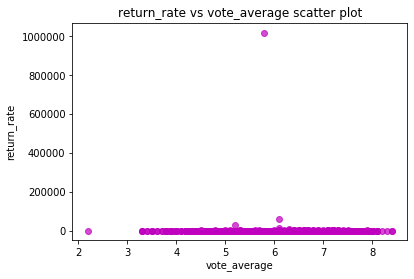

In [35]:
scatter_plot('vote_average', 'return_rate', 'm');

> The scatter plot between the return_rate and the vote_average. There is a crazy outlier up in the plot. The return rate 10E6 seems impossible to me. I want to check that point and see what happened.

In [36]:
df['return_rate'].argmax()

3769

> The argmax() function gives me the index of that row.

In [37]:
df.iloc[3769]

id                                                 8856
popularity                                     0.772494
original_title                  The Karate Kid, Part II
director                               John G. Avildsen
genres            Adventure|Drama|Action|Romance|Family
vote_count                                          211
vote_average                                        5.8
release_year                                       1986
budget_adj                                      224.803
revenue_adj                                 2.28989e+08
profit                                      2.28988e+08
return_rate                                 1.01862e+06
Name: 10495, dtype: object

> I checked the info in the row with index 3769. The revenue_adj is about 2.3E+08 while the budget_adj is only 224.803. This can't be possible. I checked the wikipedia page of the movie 'The Karate Kid', it shows that the budget of this movie is 13 million while the box office is 115.1 million. I believe the data of this movie is incorrect so that I need to exclude this point from my scatter plot. 

> Before I drop the row of the movie 'The Karate Kid', I want to sort the DataFrame df based on the return_rate and see the top 10 highest return rates.

In [41]:
df.sort_values(by='return_rate', ascending=False).return_rate.head(10)

10495    1.018618e+06
6179     5.877093e+04
3608     2.688072e+04
7447     1.288939e+04
2449     9.919000e+03
3581     1.377000e+03
1354     6.990000e+02
7277     4.990000e+02
7178     4.386166e+02
242      4.256441e+02
Name: return_rate, dtype: float64

> By observing the top10 highest return rate, I notice that the top9 return rates are significantly larger than the other return rates. If I included them in my plot, the plot would be meaningless since most data points would be squeezed together into a straight line.

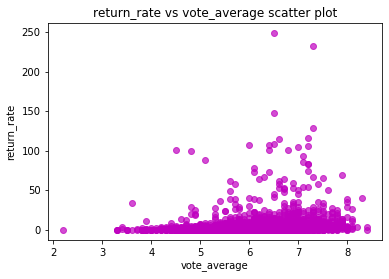

In [43]:
df2 = df.query('return_rate < 250')
plt.scatter(df2['vote_average'], df2['return_rate'], c='m', alpha=0.7)
plt.xlabel('vote_average')
plt.ylabel('return_rate')
plt.title('return_rate vs vote_average scatter plot');

> I excluded the top9 return rates by using query() function. A very interesting thing is: I checked the info of the top 9 return rates movies on the Internet, I noticed that not all of them have false numbers of budget and revenue. There are some movies out there with unbelievably high return rates! 

> Above is the scatter plot between return_rate and the vote_average. Again, a certain correlation between the two parameters is found. What is a little disappointting is that I didn't get more useful information here than what I got from the previous profit vs vote_average scatter plot.

<a id='conclusions'></a>
## Conclusions

> 1. I made two bar plots displaying yearly number of movies released in years 1960,1970,1980 and 1990,2000,2010, respectively. I found that the drama genre has the most movies released yearly, followed by comedy and action genres. 

> 2. I made a bar plot displaying the popularities of different movie genres. Although the number of drama movies released each year is the highest, they are not the most popular movies. Instead, science fiction, adventure and fantasy movies draw the most attention.

> 3. By making scatter plots between several variables(vote count, vote average, budget) and the revenue, I found there is weak positive correlation between vote count and revenue. The budget also shows a weak correlation with the revenue. The vote average shows a moderate correlation with the revenue. Among the three independent variables investigated, the vote average is most associated with movies with high revenue.

> 4. Two scatter plots(vote average vs profit, vote average vs return rate) were made. Both profit and return rate show a moderate positive correlation with vote average.

## Limitations

> 1. Notice that from 1960-1980, the total number of movies released each year is very small and there are some movie genres with no release at all. In this case, using the bar plots to decide which genre is more popular is less meaningful and may lead to inaccurate or even wrong conclusion. Considering that the TMDb dataset contains only less than 4000 movies' info after data cleaning, I doubt this TMDb dataset's completeness and quality.

> 2. In my first question "Which genres are most popular from year to year?", I only picked up 6 years to make my observations. If there are any abrupt changes between those years chosen, such changes cannot be picke up by my plots. Thus, my conclusion on this question is based on the assumption that the six years' data can roughly represent the trend from 1960-2015. 

> 3. In my first question, I used the normalized number of movies released in each genre to investigate which genre is most popular from year to year. This method might be questionable because a genre having the highest number of movies filmed each year might not be the genre attracting highest public attention. In my later analysis, I used the 'popularity' column to investigate which genre is most popular and have reached a different conclusion. This shows the importance of choosing the right parameter. 

> 4. I averaged the popularities of movies in each genre from 1960-2015 to make the bar plot. Notice that this is a crude method to process the data, since I didn't consider the possible change of the popularity from year to year.

> 5. In my second question "Which properties are associated with movies that have high revenues?". I used words like "weak","moderate" to qualitatively describe the correlation between variables. More rigorous way to do this might be using regression analysis. It's a pity that I am not familiar with doing regression analysis using Pandas.

> 6. There can be more variables associated with the movie revenue. I investigated vote count, vote average, budget. Other factors like director, cast, genres, release date etc. are not taken into consideration.

> 7. In my third question "Does higher vote score always mean a higher profit?". Here the profit data is calculated by substracting budget from revenue. I guess the revenue is simply the box office revenue and the budget is simply the production budget. However, if we want to make an accurate judgement on whether the movie is a commercial success, we also need the information on propaganda cost, interest paid etc. to better estimate the cost. Also, notice that not all box office revenue is received by the movie production company. Around 35% of gross box office revenues are asked by the distributors. Moreover, there might be extra revenue coming from later copyright royalties etc. However, the dataset does not contain these informations. Thus, our judgement on whether the movie is a successful commercial project might not be very accurate.